In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string
import os
import numpy as np
from shapely.geometry import box
from tqdm.notebook import tqdm
import datetime

# 경고 무시 모듈
import warnings

# 경고를 무시
warnings.filterwarnings(action='ignore')

# 경고 보이기  
#warnings.filterwarnings(action='default')

In [2]:
os.listdir('./전처리/grid')

['200x200',
 '250x250',
 'agg_pcell_month_inflow_ext_pop_2022_1.csv',
 'agg_pcell_month_inflow_ext_pop_2022_10.csv',
 'agg_pcell_month_inflow_ext_pop_2022_2.csv',
 'agg_pcell_month_inflow_ext_pop_2022_3.csv',
 'agg_pcell_month_inflow_ext_pop_2022_4.csv',
 'agg_pcell_month_inflow_ext_pop_2022_5.csv',
 'agg_pcell_month_inflow_ext_pop_2022_6.csv',
 'agg_pcell_month_inflow_ext_pop_2022_7.csv',
 'agg_pcell_month_inflow_ext_pop_2022_8.csv',
 'agg_pcell_month_inflow_ext_pop_2022_9.csv',
 'agg_pcell_month_inflow_int_pop_2022_1.csv',
 'agg_pcell_month_inflow_int_pop_2022_10.csv',
 'agg_pcell_month_inflow_int_pop_2022_2.csv',
 'agg_pcell_month_inflow_int_pop_2022_3.csv',
 'agg_pcell_month_inflow_int_pop_2022_4.csv',
 'agg_pcell_month_inflow_int_pop_2022_5.csv',
 'agg_pcell_month_inflow_int_pop_2022_6.csv',
 'agg_pcell_month_inflow_int_pop_2022_7.csv',
 'agg_pcell_month_inflow_int_pop_2022_8.csv',
 'agg_pcell_month_inflow_int_pop_2022_9.csv',
 'agg_pcell_month_service_pop_2022_1.csv',
 'agg_pcell

# 월별

In [84]:
def festival_buffer(file_name, year, encoding='cp949'):
    epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
    epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")
    
    
    # 병합할 포인트
    
    User_point = pd.read_csv(f'./전처리/grid/{file_name}.csv', encoding=encoding)
    
    User_point['x'] = None
    User_point['y'] = None

    for n in tqdm(range(len(User_point))):
        xy = User_point['geom'][n].split()
        User_point['x'][n] = float(xy[1].split('(')[1])
        User_point['y'][n] = float(xy[2].split(')')[0])
    
    User_point.drop('geom', axis=1, inplace=True)
    User_point['geometry'] = User_point.apply(lambda row : Point([row['x'], row['y']]), axis=1)
    
    User_point = gpd.GeoDataFrame(User_point, geometry='geometry', crs = epsg5179)
    
    # 축제 디렉토리 리스트
    
    fes_path = './전처리/축제반경/반경/'
    fes_list = os.listdir(fes_path)
    
    for fes in tqdm(fes_list):
        
        # 병합을 위한 변수
        cnct_df = None
            
        # 김해시 테마 반경
        fes_polygon = gpd.GeoDataFrame.from_file(fes_path + fes + f'/{fes}.shp', 
                                                 encoding=encoding)
        fes_polygon.crs = epsg5179

        # 공간 병합
        result = gpd.sjoin(fes_polygon, User_point, how='left', op="intersects")

        result.drop(['index_right', 'gid', 'recordid', 'hcode','x','y'], axis=1, inplace=True)

        result.reset_index(drop=True, inplace=True)

        result['sum_pop'] = int(result['sum_pop'].sum())
        result['w_pop'] = int(result['w_pop'].sum())
        result['v_pop'] = int(result['v_pop'].sum())
        result['h_pop'] = int(result['h_pop'].sum())

        result.drop([n for n in range(1, len(result))], axis=0, inplace=True)


        month = file_name.split('_')[-1]

        month_0 = int(month)

        result['layer'] = fes

        # 폴더 생성
        try:
            directory = f'./전처리/축제반경/반경_데이터_병합/{year}년/{month}월/{fes}/'
            if not os.path.exists(directory):
                os.makedirs(directory)
        except OSError:
            print ('Error: Creating directory. ' +  directory)


        result = result.astype({'distance':int, 'year':int, 'month':int})

        # shp파일 저장
        result.to_file(f'{directory}{fes}.shp',encoding='cp949', driver='ESRI Shapefile')

In [85]:
# 월별 반경
for n in tqdm(range(3, 11)):
    festival_buffer(f'agg_pcell_time_service_pop_2022_{n}', 2022)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/74465 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/75963 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/76158 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/75755 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/76922 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/77208 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/77181 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/77381 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [87]:
month_path = './전처리/축제반경/반경_데이터_병합/2022년/'
month_list = os.listdir(month_path)

epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")


df = None
df_all = None

for month in tqdm(month_list):
    w_list = os.listdir(month_path + month)
    print(month)

    day_path = month_path + month

    df_1 = gpd.GeoDataFrame.from_file(day_path + '/분성광장/분성광장.shp', 
                                      encoding='cp949')
    df_2 = gpd.GeoDataFrame.from_file(day_path + '/수로왕릉인근/수로왕릉인근.shp', 
                                      encoding='cp949')
    df_3 = gpd.GeoDataFrame.from_file(day_path + '/내외동_연지사거리/내외동_연지사거리.shp', 
                                      encoding='cp949')
    df_4 = gpd.GeoDataFrame.from_file(day_path + '/장유_코아상가/장유_코아상가.shp', 
                                      encoding='cp949')
    

    df_1.crs = epsg5179
    df_2.crs = epsg5179
    df_3.crs = epsg5179
    df_4.crs = epsg5179
    
    df = pd.concat([df_1, df_2, df_3, df_4])
        
    if month == '10월':
        df_all = df
        continue
    df_all = pd.concat([df_all, df])

  0%|          | 0/8 [00:00<?, ?it/s]

10월
3월
4월
5월
6월
7월
8월
9월


In [96]:
df_all[df_all['month'] == 10]

id  ringId  distance  year  month    h_pop   w_pop   v_pop  sum_pop  \
0  None       1       250  2022     10  1978303  212672  634417  2825469   
0  None       1       250  2022     10   158651   20045   59537   238314   
0  None       1       250  2022     10  2551171  204038  299984  3055269   
0  None       1       250  2022     10  3008930  263259  582556  3854822   

       layer                                           geometry  
0       분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...  
0     수로왕릉인근  POLYGON ((1125562.445 1694161.301, 1125562.252...  
0  내외동_연지사거리  POLYGON ((1124693.945 1694663.576, 1124693.752...  
0    장유_코아상가  POLYGON ((1119437.896 1690638.225, 1119437.703...

# 일별

In [11]:
year = 2022
month = 3

path = f'./전처리/grid/축제_그리드/{year}년/{month}월/'
day_csv_li = os.listdir(path)
day_csv_li

['agg_pcell_time_service_pop_2022_3_1.csv',
 'agg_pcell_time_service_pop_2022_3_10.csv',
 'agg_pcell_time_service_pop_2022_3_11.csv',
 'agg_pcell_time_service_pop_2022_3_12.csv',
 'agg_pcell_time_service_pop_2022_3_13.csv',
 'agg_pcell_time_service_pop_2022_3_14.csv',
 'agg_pcell_time_service_pop_2022_3_15.csv',
 'agg_pcell_time_service_pop_2022_3_16.csv',
 'agg_pcell_time_service_pop_2022_3_17.csv',
 'agg_pcell_time_service_pop_2022_3_18.csv',
 'agg_pcell_time_service_pop_2022_3_19.csv',
 'agg_pcell_time_service_pop_2022_3_2.csv',
 'agg_pcell_time_service_pop_2022_3_20.csv',
 'agg_pcell_time_service_pop_2022_3_21.csv',
 'agg_pcell_time_service_pop_2022_3_22.csv',
 'agg_pcell_time_service_pop_2022_3_23.csv',
 'agg_pcell_time_service_pop_2022_3_24.csv',
 'agg_pcell_time_service_pop_2022_3_25.csv',
 'agg_pcell_time_service_pop_2022_3_26.csv',
 'agg_pcell_time_service_pop_2022_3_27.csv',
 'agg_pcell_time_service_pop_2022_3_28.csv',
 'agg_pcell_time_service_pop_2022_3_29.csv',
 'agg_pcell_

In [57]:
def festival_buffer_day(year, month, where=None, encoding='cp949'):
    epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
    epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")
    
    print(f'{month}월 진행중')
    
    path = f'./전처리/grid/축제_그리드/{year}년/{month}월/'
    day_csv_li = os.listdir(path)
    
    
    for day_csv in tqdm(day_csv_li):
        
        # 병합할 포인트
        User_point = pd.read_csv(f'{path}{day_csv}', encoding=encoding)

        User_point['x'] = None
        User_point['y'] = None

        for n in range(len(User_point)):
            xy = User_point['geom'][n].split()
            User_point['x'][n] = float(xy[1].split('(')[1])
            User_point['y'][n] = float(xy[2].split(')')[0])

        User_point.drop('geom', axis=1, inplace=True)
        User_point['geometry'] = User_point.apply(lambda row : Point([row['x'], row['y']]), axis=1)

        User_point = gpd.GeoDataFrame(User_point, geometry='geometry', crs = epsg5179)

        # 축제 디렉토리 리스트

        fes_path = './전처리/축제반경/반경/'
        fes_list = os.listdir(fes_path)
        
        
        #----------------------------------------------------
        if where == '내외동':
            fes_list = [os.listdir(fes_path)[0]]
        #----------------------------------------------------
        
        
        for fes in fes_list:

            # 병합을 위한 변수
            cnct_df = None

            # 김해시 테마 반경
            fes_polygon = gpd.GeoDataFrame.from_file(fes_path + fes + f'/{fes}.shp', 
                                                     encoding=encoding)
            fes_polygon.crs = epsg5179

            # 공간 병합
            result = gpd.sjoin(fes_polygon, User_point, how='left', op="intersects")

            result.drop(['index_right', 'gid', 'recordid', 'hcode','x','y'], axis=1, inplace=True)

            result.reset_index(drop=True, inplace=True)

            result['sum_pop'] = int(result['sum_pop'].sum())
            result['w_pop'] = int(result['w_pop'].sum())
            result['v_pop'] = int(result['v_pop'].sum())
            result['h_pop'] = int(result['h_pop'].sum())

            result.drop([n for n in range(1, len(result))], axis=0, inplace=True)
            
            
            day = day_csv.split('.')[0]
            day = day_csv.split('_')[-1]

            month_0 = int(month)

            result['layer'] = fes

            # 폴더 생성
            try:
                directory = f'./전처리/축제반경/반경_데이터_병합/일별/{year}년/{month}월/{day}일/{fes}/'
                if not os.path.exists(directory):
                    os.makedirs(directory)
            except OSError:
                print ('Error: Creating directory. ' +  directory)


            result = result.astype({'distance':int, 'year':int, 'month':int})

            # shp파일 저장
            result.to_file(f'{directory}{fes}.shp',encoding='cp949', driver='ESRI Shapefile')

In [5]:
m = [3,5,6,7,8]
for n in tqdm(m):
    festival_buffer_day(2022, n)

  0%|          | 0/5 [00:00<?, ?it/s]

3월 진행중


  0%|          | 0/31 [00:00<?, ?it/s]

5월 진행중


  0%|          | 0/31 [00:00<?, ?it/s]

6월 진행중


  0%|          | 0/30 [00:00<?, ?it/s]

7월 진행중


  0%|          | 0/31 [00:00<?, ?it/s]

8월 진행중


  0%|          | 0/31 [00:00<?, ?it/s]

In [58]:
m = [6,9]
for n in tqdm(m):
    festival_buffer_day(2022, n, '내외동')

  0%|          | 0/2 [00:00<?, ?it/s]

6월 진행중


  0%|          | 0/30 [00:00<?, ?it/s]

9월 진행중


  0%|          | 0/30 [00:00<?, ?it/s]

In [3]:
month_path = './전처리/축제반경/반경_데이터_병합/일별/2022년/'
month_list = os.listdir(month_path)

epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
epsg5179 = from_string("+proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs")


df = None
df_sum = None
df_all = None

for month in tqdm(month_list):
    day_list = os.listdir(month_path + month)
    print(month)
    for day in tqdm(day_list):
        day_path = month_path + month + '/' + day
    
        df_1 = gpd.GeoDataFrame.from_file(day_path + '/분성광장/분성광장.shp', 
                                          encoding='cp949')
        df_2 = gpd.GeoDataFrame.from_file(day_path + '/수로왕릉인근/수로왕릉인근.shp', 
                                          encoding='cp949')
        
        
        df_1.crs = epsg5179
        df_2.crs = epsg5179
        
        df = pd.concat([df_1, df_2])
        
        
        if month in ['6월', '9월']:
            df_3 = gpd.GeoDataFrame.from_file(day_path + '/내외동_연지사거리/내외동_연지사거리.shp', 
                                              encoding='cp949')
            df_3.crs = epsg5179
            df = pd.concat([df_1, df_2, df_3])
        
        
        if day == '1.csv일':
            df_sum = df
            continue
        df_sum = pd.concat([df_sum, df])
        
    if month == '10월':
        df_all = df_sum
        continue
    df_all = pd.concat([df_all, df_sum])

  0%|          | 0/8 [00:00<?, ?it/s]

10월


  0%|          | 0/31 [00:00<?, ?it/s]

3월


  0%|          | 0/31 [00:00<?, ?it/s]

4월


  0%|          | 0/30 [00:00<?, ?it/s]

5월


  0%|          | 0/31 [00:00<?, ?it/s]

6월


  0%|          | 0/30 [00:00<?, ?it/s]

7월


  0%|          | 0/31 [00:00<?, ?it/s]

8월


  0%|          | 0/31 [00:00<?, ?it/s]

9월


  0%|          | 0/30 [00:00<?, ?it/s]

In [4]:
df_all.reset_index(drop=True, inplace=True)

In [5]:
df_all = df_all.astype({'day' : int})

In [55]:
days = ['월','화','수','목','금','토','일']
df_all['DoW'] = None
for n in tqdm(range(len(df_all))):
    df_all['DoW'][n] = days[datetime.date(df_all['year'][n], df_all['month'][n], df_all['day'][n]).weekday()]

  0%|          | 0/550 [00:00<?, ?it/s]

In [57]:
df_all

id  ringId  distance  year  month  day  h_pop  w_pop  v_pop  sum_pop  \
0    None       1       250  2022     10    1  64208   4244  24340    92861   
1    None       1       250  2022     10    1   5088    393   2355     7911   
2    None       1       250  2022     10   10  68591   4236  20648    93547   
3    None       1       250  2022     10   10   5399    386   1880     7734   
4    None       1       250  2022     10   11  62511   8905  17563    89064   
..    ...     ...       ...   ...    ...  ...    ...    ...    ...      ...   
545  None       1       250  2022      9    8   4901    812   1900     7684   
546  None       1       250  2022      9    8  76511   7538  10210    94339   
547  None       1       250  2022      9    9  64411   3560  29000    97053   
548  None       1       250  2022      9    9   4990    333   2319     7717   
549  None       1       250  2022      9    9  75435   2833  16615    94959   

         layer                                           geometry DoW  
0         분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   토  
1       수로왕릉인근  POLYGON ((1125562.445 1694161.301, 1125562.252...   토  
2         분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   월  
3       수로왕릉인근  POLYGON ((1125562.445 1694161.301, 1125562.252...   월  
4         분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   화  
..         ...                                                ...  ..  
545     수로왕릉인근  POLYGON ((1125562.445 1694161.301, 1125562.252...   목  
546  내외동_연지사거리  POLYGON ((1124693.945 1694663.576, 1124693.752...   목  
547       분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   금  
548     수로왕릉인근  POLYGON ((1125562.445 1694161.301, 1125562.252...   금  
549  내외동_연지사거리  POLYGON ((1124693.945 1694663.576, 1124693.752...   금  

[550 rows x 13 columns]

In [45]:
def festival_plot(DF, Month:int, Place:str):
    df = DF[DF['month']==Month]
    df.sort_values('day', inplace=True)
    df = df[df['layer']==Place]
    df.reset_index(drop=True, inplace=True)
    df = df.astype({'day' : str})
    
    
    ##########################  그래프 한글  ###############################
    import pandas as pd
    import matplotlib.pyplot as plt
    import os

    import platform
    from matplotlib import font_manager, rc # Runtime Configuration
    
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')
    ########################################################################
    
    
    f, ax = plt.subplots(figsize=(15, 5), facecolor='w')
    plt.rc('font', size=15)
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')


    x = df['day']

    y_1 = df['sum_pop']

    plt.plot(x, y_1,
            linewidth='3',
            color='orange',
            marker='o',
            markersize=10)

    # for i in range(len(x)):
    #     height = y_1[i]
    #     plt.text(x[i], height + 300, '%.0f' %height, ha='center', va='bottom', size = 20)

    plt.xlabel(f'22년 {Month}월 일별', labelpad=20, size=20, weight ='bold')
    plt.ylabel('유동인구', labelpad=20, size=20, weight ='bold')

    plt.show()

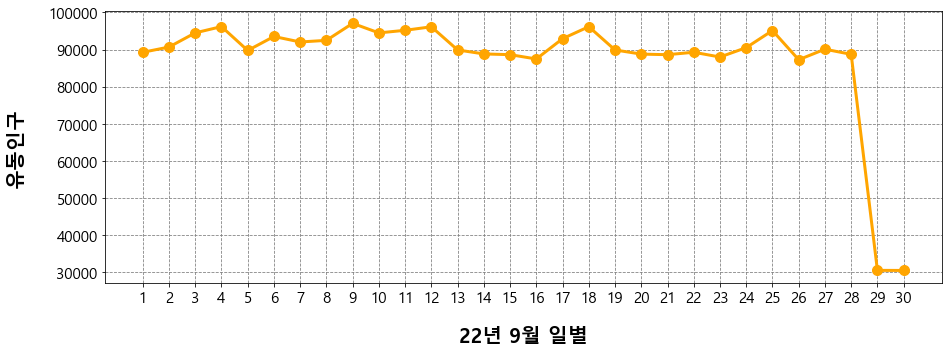

In [58]:
festival_plot(df_all, 9, '분성광장')

In [59]:
df = df_all[df_all['month']==9]
df[df['layer']=='분성광장'].sort_values('day')

id  ringId  distance  year  month  day  h_pop  w_pop  v_pop  sum_pop  \
460  None       1       250  2022      9    1  61526   9688  17954    89251   
493  None       1       250  2022      9    2  62082   9475  19046    90673   
526  None       1       250  2022      9    3  67591   4769  22052    94491   
532  None       1       250  2022      9    4  70997   3608  21498    96181   
535  None       1       250  2022      9    5  65515   8286  15865    89742   
538  None       1       250  2022      9    6  69714   6633  17087    93516   
541  None       1       250  2022      9    7  61525   9575  20867    92033   
544  None       1       250  2022      9    8  61673   9337  21387    92473   
547  None       1       250  2022      9    9  64411   3560  29000    97053   
463  None       1       250  2022      9   10  56984   2124  35293    94482   
466  None       1       250  2022      9   11  62313   2815  29981    95183   
469  None       1       250  2022      9   12  69156   3375  23522    96128   
472  None       1       250  2022      9   13  62685   9278  17854    89887   
475  None       1       250  2022      9   14  62290   9271  17173    88815   
478  None       1       250  2022      9   15  61905   9516  17120    88617   
481  None       1       250  2022      9   16  60717   9401  17262    87456   
484  None       1       250  2022      9   17  66138   4570  22135    92925   
487  None       1       250  2022      9   18  71086   3492  21495    96156   
490  None       1       250  2022      9   19  63579   9465  16761    89882   
496  None       1       250  2022      9   20  61735   9395  17553    88768   
499  None       1       250  2022      9   21  61622   9194  17717    88611   
502  None       1       250  2022      9   22  61148   9424  18615    89266   
505  None       1       250  2022      9   23  59685   8999  19216    87984   
508  None       1       250  2022      9   24  63488   4309  22635    90511   
511  None       1       250  2022      9   25  68928   3308  22800    95113   
514  None       1       250  2022      9   26  60949   9081  17147    87253   
517  None       1       250  2022      9   27  61186   9140  19688    90090   
520  None       1       250  2022      9   28  61193   9216  18222    88706   
523  None       1       250  2022      9   29  18771   4723   6929    30502   
529  None       1       250  2022      9   30  18353   4641   7403    30480   

    layer                                           geometry DoW  
460  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   목  
493  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   금  
526  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   토  
532  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   일  
535  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   월  
538  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   화  
541  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   수  
544  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   목  
547  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   금  
463  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   토  
466  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   일  
469  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   월  
472  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   화  
475  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   수  
478  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   목  
481  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   금  
484  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   토  
487  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   일  
490  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   월  
496  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   화  
499  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   수  
502  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   목  
505  분성광장  POLYG

In [60]:
df = df_all[df_all['month']==10]
df[df['layer']=='분성광장'].sort_values('day')

id  ringId  distance  year  month  day  h_pop  w_pop  v_pop  sum_pop  \
0   None       1       250  2022     10    1  64208   4244  24340    92861   
22  None       1       250  2022     10    2  65433   3491  27451    96455   
44  None       1       250  2022     10    3  68291   3996  20564    92934   
50  None       1       250  2022     10    4  63483   8427  17121    89103   
52  None       1       250  2022     10    5  62126   8427  18209    88840   
54  None       1       250  2022     10    6  61483   8306  17389    87252   
56  None       1       250  2022     10    7  61314   8423  19680    89499   
58  None       1       250  2022     10    8  65007   4231  23556    92870   
60  None       1       250  2022     10    9  66975   3135  23975    94168   
2   None       1       250  2022     10   10  68591   4236  20648    93547   
4   None       1       250  2022     10   11  62511   8905  17563    89064   
6   None       1       250  2022     10   12  61950   8919  18791    89737   
8   None       1       250  2022     10   13  62013   9041  17915    89046   
10  None       1       250  2022     10   14  61952   7506  20703    90240   
12  None       1       250  2022     10   15  65395   4587  25595    95653   
14  None       1       250  2022     10   16  68773   3482  23021    95351   
16  None       1       250  2022     10   17  62866   9074  17909    89926   
18  None       1       250  2022     10   18  62114   8777  18735    89709   
20  None       1       250  2022     10   19  61941   8355  18902    89280   
24  None       1       250  2022     10   20  62089   8313  17932    88407   
26  None       1       250  2022     10   21  61941   8111  18744    88869   
28  None       1       250  2022     10   22  64635   4516  24973    94199   
30  None       1       250  2022     10   23  68577   3554  24408    96618   
32  None       1       250  2022     10   24  62828   9015  17637    89563   
34  None       1       250  2022     10   25  62125   9004  17227    88431   
36  None       1       250  2022     10   26  61483   8753  17565    87884   
38  None       1       250  2022     10   27  60608   9032  18533    88252   
40  None       1       250  2022     10   28  60376   8675  19133    88255   
42  None       1       250  2022     10   29  64878   4508  23822    93279   
46  None       1       250  2022     10   30  69344   3670  23349    96441   
48  None       1       250  2022     10   31  61857   8793  17842    88572   

   layer                                           geometry DoW  
0   분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   토  
22  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   일  
44  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   월  
50  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   화  
52  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   수  
54  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   목  
56  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   금  
58  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   토  
60  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   일  
2   분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   월  
4   분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   화  
6   분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   수  
8   분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   목  
10  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   금  
12  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   토  
14  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   일  
16  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   월  
18  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   화  
20  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   수  
24  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   목  
26  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...   금  
28  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623.

In [39]:
df_all[df_all['layer']=='분성광장'].sort_values('sum_pop').tail(1)

id  ringId  distance  year  month   day  h_pop  w_pop  v_pop  sum_pop  \
100  None       1       250  2022      3  27.0  71376   4862  23216    99538   

    layer                                           geometry  
100  분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...

In [42]:
df_all[df_all['layer']=='수로왕릉인근'].sort_values('sum_pop').tail(1)

id  ringId  distance  year  month   day  h_pop  w_pop  v_pop  sum_pop  \
13  None       1       250  2022     10  15.0   5180    439   2741     8446   

     layer                                           geometry  
13  수로왕릉인근  POLYGON ((1125562.445 1694161.301, 1125562.252...

In [83]:
m, d = 6, 17

df_all[(df_all['month'] == m) & (df_all['day'] == d)]

id  ringId  distance  year  month  day  h_pop  w_pop  v_pop  sum_pop  \
270  None       1       250  2022      6   17  61636   9476  19157    90351   
271  None       1       250  2022      6   17   5112    864   1795     7850   
272  None       1       250  2022      6   17  72266   7516   7927    87788   

         layer                                           geometry  
270       분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...  
271     수로왕릉인근  POLYGON ((1125562.445 1694161.301, 1125562.252...  
272  내외동_연지사거리  POLYGON ((1124693.945 1694663.576, 1124693.752...

In [45]:
m, d = 10, 16

df_all[(df_all['month'] == m) & (df_all['day'] == d)]

id  ringId  distance  year  month   day  h_pop  w_pop  v_pop  sum_pop  \
14  None       1       250  2022     10  16.0  68773   3482  23021    95351   
15  None       1       250  2022     10  16.0   5473    312   2209     8071   

     layer                                           geometry  
14    분성광장  POLYGON ((1126050.815 1694320.982, 1126050.623...  
15  수로왕릉인근  POLYGON ((1125562.445 1694161.301, 1125562.252...